# Scipy odeint practice

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
C = 10.0 * 1e-9 # C = 10nF
R = 5000.0 # R = 5 kOhm
V0 = 5.0 # Initial voltage = 5 Volt

In [3]:
def model(V, t):
    dVdt = -1.0 * V / (C * R)
    return dVdt

In [4]:
t = np.linspace(0, 1e-3, 100)
V = odeint(model, V0, t) # Solve V(t) using odeint
V_ref = V0 * np.exp(-1.0 * t / (C * R)) # Analytical solution of V(t)

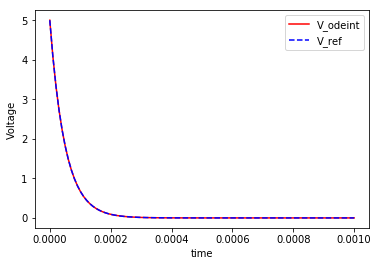

In [5]:
plt.plot(t, V, 'r-', label='V_odeint')
plt.plot(t, V_ref, 'b--', label='V_ref')
plt.xlabel('time')
plt.ylabel('Voltage')
plt.legend()
plt.show()